In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from matplotlib.colors import BoundaryNorm, ListedColormap
import seaborn as sns
from pathlib import Path
from IPython.display import display

sns.set()
plt.rcParams["svg.fonttype"] = "none"

In [2]:
DATA_PATH = Path("../../data/pendulum/preprocessed")
FIGS_PATH = Path("figures/eda-pendulum/")

In [3]:
%%time

df_train = pd.read_parquet(DATA_PATH / "train")
df_train

CPU times: user 386 ms, sys: 126 ms, total: 512 ms
Wall time: 318 ms


,id,target,x,y,time,_seq_len,_last_time
0,0,1.847310,"[-0.9975038, -0.96678126, -0.94608426, -0.9073...","[0.07061237, -0.2556052, -0.32392064, -0.42035...","[0.21384464, 0.6290891, 0.71415806, 0.8372017,...",26,4.086655
1,1,2.139237,"[0.77662164, 0.7371434, 0.7033177, 0.6374018, ...","[-0.62996733, -0.6757363, -0.71087563, -0.7705...","[0.18595418, 0.26659968, 0.33381647, 0.4620988...",30,3.250723
2,2,2.073159,"[0.2997734, 0.24962981, 0.18933569, -0.0533250...","[nan, -0.96834135, -0.98191243, -0.99857724, -...","[0.43995458, 0.4831565, 0.53294456, 0.7484619,...",29,3.643831
3,3,2.344096,"[0.7307827, 0.5459692, 0.29678836, 0.27414086,...","[-0.6826102, -0.8378053, -0.9549433, -0.961689...","[0.040899925, 0.15128754, 0.3170963, 0.3343165...",39,3.092133
4,4,2.794140,"[0.9997076, nan, nan, 0.96192014, 0.9594528, 0...","[0.024182694, -0.012163048, -0.23511118, -0.27...","[0.02919955, 0.08187326, 0.49370188, 0.5811324...",41,4.365909
...,...,...,...,...,...,...,...
79995,79995,1.911807,"[-0.99494827, -0.93054515, -0.8274749, -0.1362...","[0.10038904, -0.36617714, -0.5615027, -0.99067...","[0.022624949, 0.5944593, 0.803812, 1.7387259, ...",21,4.672887
79996,79996,1.067165,"[-0.9656585, -0.98045033, -0.9998429, -0.90042...","[0.25981462, 0.19676672, 0.017724846, -0.43501...","[0.21127789, 0.42324784, 0.60515463, 0.8907747...",34,3.480112
79997,79997,2.160602,"[0.46151116, 0.54564273, 0.5560578, nan, 0.543...","[-0.88713443, -0.83801794, nan, -0.8346802, -0...","[0.37133592, 0.67890704, 0.8816134, 1.0195664,...",26,4.803696
79998,79998,1.864008,"[0.6094767, nan, 0.7464821, 0.8286341, 0.83226...","[0.79280394, 0.69915146, 0.6654055, nan, 0.554...","[0.527804, 0.7462749, 0.82499903, 1.0674343, 1...",37,4.663024


In [25]:
item = df_train.iloc[7]
item

id                                                            7
target                                                 1.366067
x             [nan, -0.9184805, -0.9185238, -0.92324865, -0....
y             [-0.56242764, -0.3954663, -0.39536577, -0.3842...
time          [0.08339636, 0.195343, 0.19541956, 0.20402224,...
_seq_len                                                     36
_last_time                                             3.296794
Name: 7, dtype: object

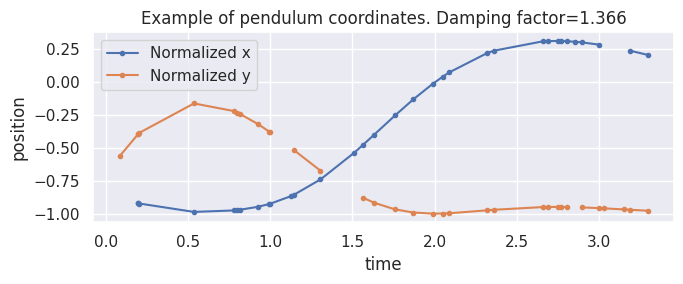

In [56]:
fig, ax = plt.subplots(layout="tight", figsize=(7, 3))

ax.set_title(
    "Example of pendulum coordinates. Damping factor="
    f"{round(float(item['target']), 3)}"
)
ax.plot(item["time"], item["x"], marker=".", label="Normalized x")
ax.plot(item["time"], item["y"], marker=".", label="Normalized y")
ax.legend()
ax.set_xlabel("time")
ax.set_ylabel("position")

fig.savefig(FIGS_PATH / "pendulum_example.pdf")

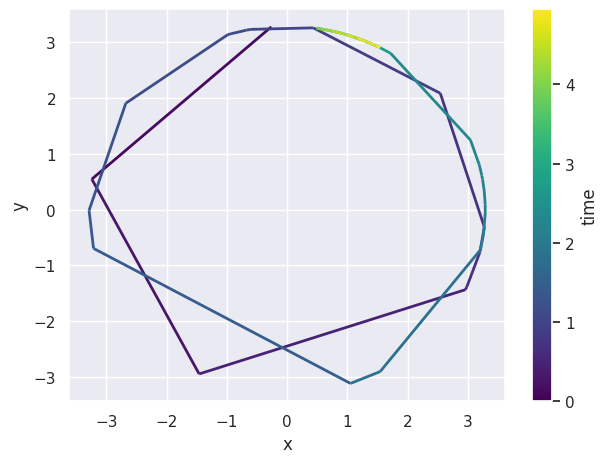

In [45]:
points = np.array([item["x"], item["y"]]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)

fig, ax = plt.subplots(layout="tight")

norm = plt.Normalize(0.0, item["time"].max())
lc = LineCollection(segments, cmap="viridis", norm=norm)

lc.set_array(item["time"])
lc.set_linewidth(2)
line = ax.add_collection(lc)

gap = 0.05
xm, xM = item["x"].min(), item["x"].max()
xm, xM = xm - gap * (xM - xm), xM + gap * (xM - xm)
ym, yM = item["y"].min(), item["y"].max()
ym, yM = ym - gap * (yM - ym), yM + gap * (yM - ym)

ax.set_xlim(xm, xM)
ax.set_ylim(ym, yM)
ax.set_xlabel("x")
ax.set_ylabel("y")

fig.colorbar(line, ax=ax, label="time")
fig.savefig(FIGS_PATH / "trajectory.svg")